# Problem 1 Gamma and Beta occur more often than you think: (30%)

A box is to be constructed so that the height is 1 meter and
its base is $X$ meter by $X$ meter. If $X$ is a random variable with a standard normal distribution (standard Guassian distribution), then  
* (1) Derive the probability density function of the volume $V$ from that of X. (15%)
* (2) The probability density function of $V$ is actually a Gamma distribution.  What are the values of the parameters $\theta$ and $\alpha$, respectively? (15%)



# Problem 2 Random Variable Transformation: (40%)

Min() and Max() appears frequently in applications of data science.  
Let X and Y be two independent random variables with identical probability density function given by
$$f(x) =\begin{cases}
e^{-x} & for\; x > 0 \\
0 & elsewhere.\end{cases}$$
* What is the probability density function of $Z = max(X, Y)$?
* What is the probability density function of $W = min(X, Y)$?


## Problem 3 SVD vs Image Compression (30%):

### Background Information
SVD decomposes a matrix $A$ into $U\Sigma V^T$.

We can reduce the size of an image in bytes to an acceptable level of quality utilizing SVD. This means that we are able to store the images in the smaller storage space.

Here we use the fact that, after SVD decomposition, often only a few singular values in $\Sigma$ are large. We can trim down the size of the decomposed matrices, by using only the first few singular values in $\Sigma$ and using the corresponding data in $U$ and $V$, while maintaining a good approximation of the original image. 

Some of the images reproduced using such trimmed down matrices are nearly indistinguishable from the original image when seeing with the human eye. 

### Question:
Make suitable modifications to the following program so that the program prints out 6 different versions of B.jpg, using 100%, 80%, 50%, 20%, 10%, and 5% of singular values and corresponding amount of data in U and V matrices. 

* **Note:** Put the image files A.jpg and B.jpg in the same folder as the Python code.  
* **Hint:** Make sure you truly understand SVD and how python and numpy work.  Then you only need to modify/add very few lines of code.
* **Comment:** After you finish this homework problem, you can observe and appreciate how singular value decomposition can be provide insights for us to  preserve useful information in data.  

img shape (638, 960)
img2 shape (2592, 1936)
(2592, 2592) (1936,) (1936, 1936)


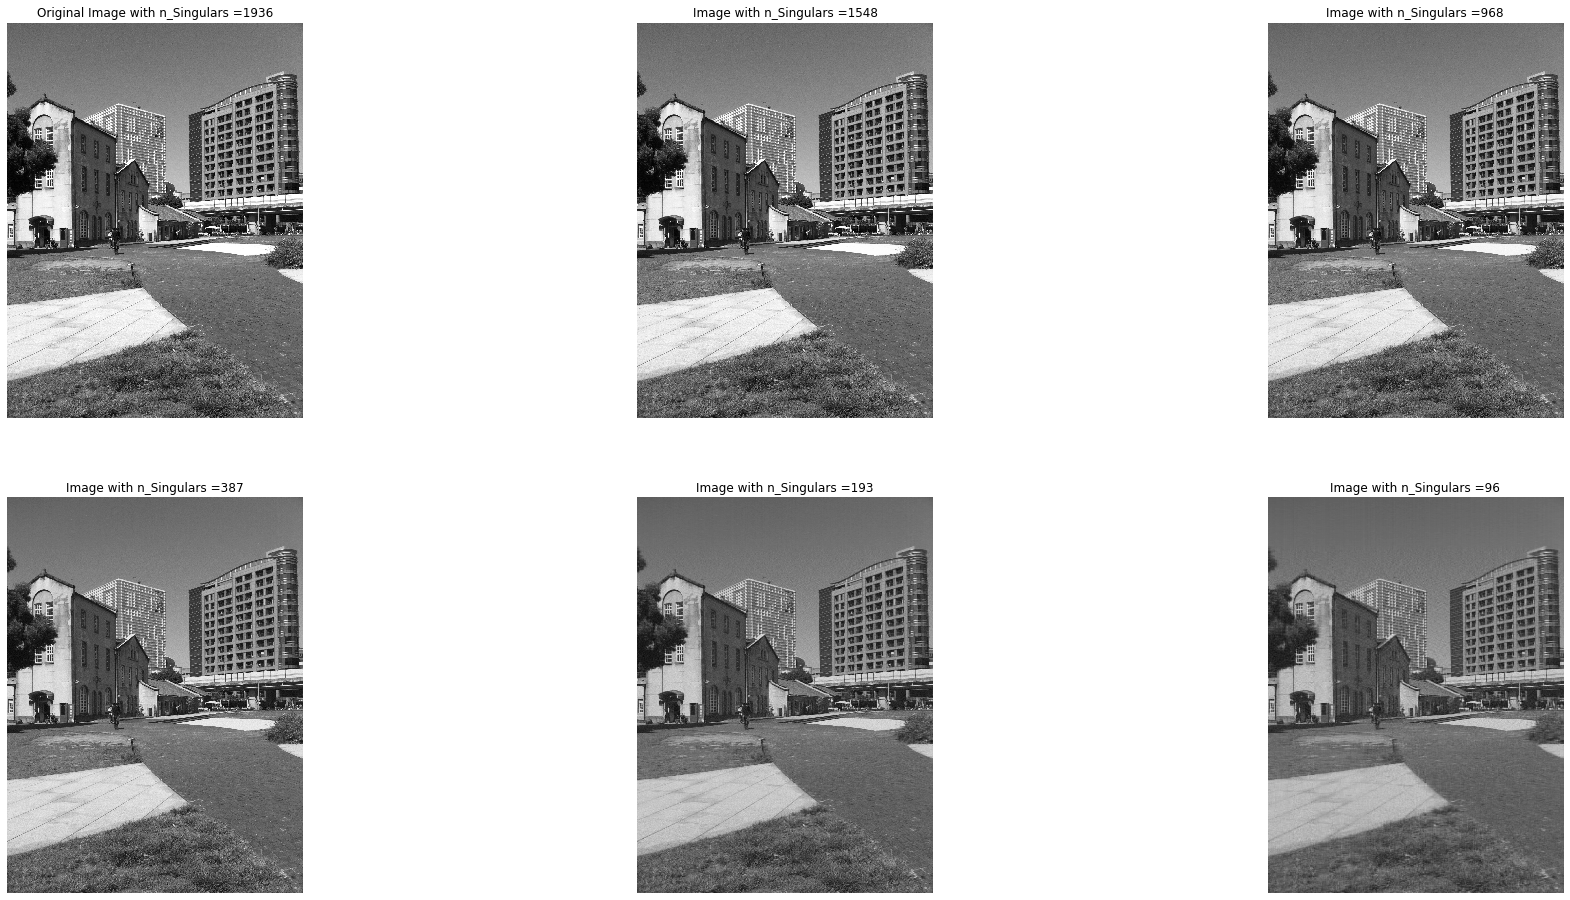

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math as mt

# read image in grayscale
img = cv2.imread('A.jpg', 0)
img2 = cv2.imread('B.jpg',0)
print('img shape',img.shape)
print('img2 shape',img2.shape)
# obtain svd
U, S, V = np.linalg.svd(img2)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

size = 1936 # 638
nSingular = [size, mt.floor(size*0.8), mt.floor(size*0.5), mt.floor(size*0.2), mt.floor(size*0.1), mt.floor(size*0.05)]

plt.figure(figsize = (32, 16))
for i in range(6):
    low_rank = U[:, :nSingular[i]] @ np.diag(S[:nSingular[i]]) @ V[:nSingular[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_Singulars =" + str(nSingular[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Image with n_Singulars =" + str(nSingular[i]))